Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


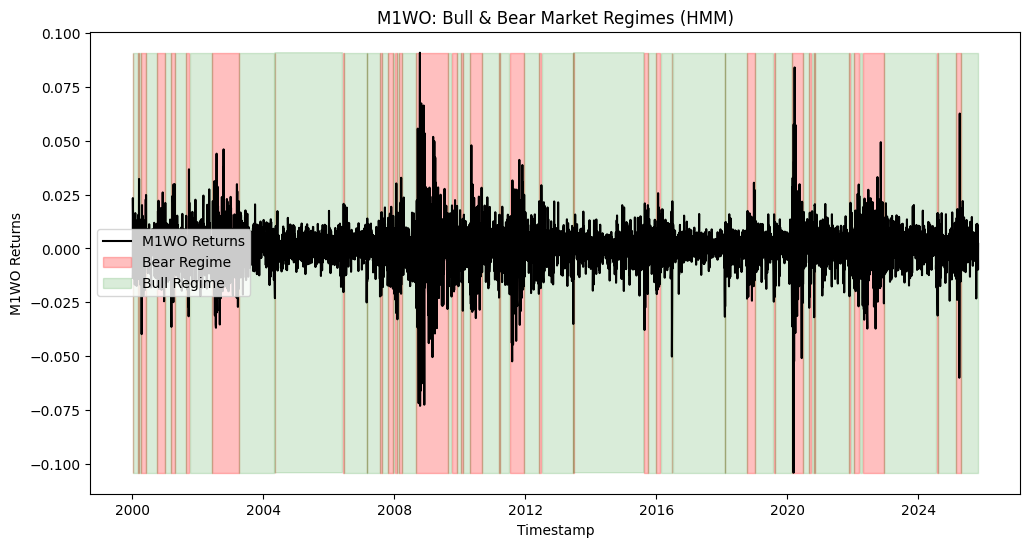

In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.Classification.models_classification as modl

import numpy as np
import pandas as pd
df = dp.create_classification_data(quiet=False)

In [2]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="logit",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  

CPU worker processing block starting at index 0, date 2007-01-01
CPU worker processing block starting at index 30, date 2007-02-12
CPU worker processing block starting at index 60, date 2007-03-26
CPU worker processing block starting at index 90, date 2007-05-07
CPU worker processing block starting at index 120, date 2007-06-18
CPU worker processing block starting at index 150, date 2007-07-30
CPU worker processing block starting at index 180, date 2007-09-10
CPU worker processing block starting at index 210, date 2007-10-22
CPU worker processing block starting at index 240, date 2007-12-03
CPU worker processing block starting at index 270, date 2008-01-14
CPU worker processing block starting at index 300, date 2008-02-25
CPU worker processing block starting at index 330, date 2008-04-07
CPU worker processing block starting at index 360, date 2008-05-19
CPU worker processing block starting at index 390, date 2008-06-30
CPU worker processing block starting at index 420, date 2008-08-11


In [3]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=700,      # fit monthly (approx 30 trading days)
    model="rf",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

CPU worker processing block starting at index 0, date 2007-01-01
CPU worker processing block starting at index 700, date 2009-09-07
CPU worker processing block starting at index 1400, date 2012-05-14
CPU worker processing block starting at index 2100, date 2015-01-19
CPU worker processing block starting at index 2800, date 2017-09-25
CPU worker processing block starting at index 3500, date 2020-06-01
CPU worker processing block starting at index 4200, date 2023-02-06
CPU worker processing block starting at index 4900, date 2025-10-13
Accuracy: 0.8822
Precision: 0.7913
Recall: 0.7067
F1 Score: 0.7466


In [4]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="majority",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

CPU worker processing block starting at index 0, date 2007-01-01
CPU worker processing block starting at index 30, date 2007-02-12
CPU worker processing block starting at index 60, date 2007-03-26
CPU worker processing block starting at index 90, date 2007-05-07
CPU worker processing block starting at index 120, date 2007-06-18
CPU worker processing block starting at index 150, date 2007-07-30
CPU worker processing block starting at index 180, date 2007-09-10
CPU worker processing block starting at index 210, date 2007-10-22
CPU worker processing block starting at index 240, date 2007-12-03
CPU worker processing block starting at index 270, date 2008-01-14
CPU worker processing block starting at index 300, date 2008-02-25
CPU worker processing block starting at index 330, date 2008-04-07
CPU worker processing block starting at index 360, date 2008-05-19
CPU worker processing block starting at index 390, date 2008-06-30
CPU worker processing block starting at index 420, date 2008-08-11


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [5]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="mantis_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

[mantis_head] refit at 2007-01-01 using data up to 2006-12-29 | predicted 1000 days
[mantis_head] refit at 2010-11-01 using data up to 2010-10-29 | predicted 1000 days
[mantis_head] refit at 2014-09-01 using data up to 2014-08-29 | predicted 1000 days
[mantis_head] refit at 2018-07-02 using data up to 2018-06-29 | predicted 1000 days
[mantis_head] refit at 2022-05-02 using data up to 2022-04-29 | predicted 915 days
Accuracy: 0.6826
Precision: 0.3417
Recall: 0.3157
F1 Score: 0.3282


In [3]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="tabpfn25",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  

[tabpfn25] refit at 2007-01-01 using data up to 2006-12-29 | predicted 1000 days
[tabpfn25] refit at 2010-11-01 using data up to 2010-10-29 | predicted 1000 days
[tabpfn25] refit at 2014-09-01 using data up to 2014-08-29 | predicted 1000 days
[tabpfn25] refit at 2018-07-02 using data up to 2018-06-29 | predicted 1000 days
[tabpfn25] refit at 2022-05-02 using data up to 2022-04-29 | predicted 915 days
Accuracy: 0.8547
Precision: 0.8039
Recall: 0.5402


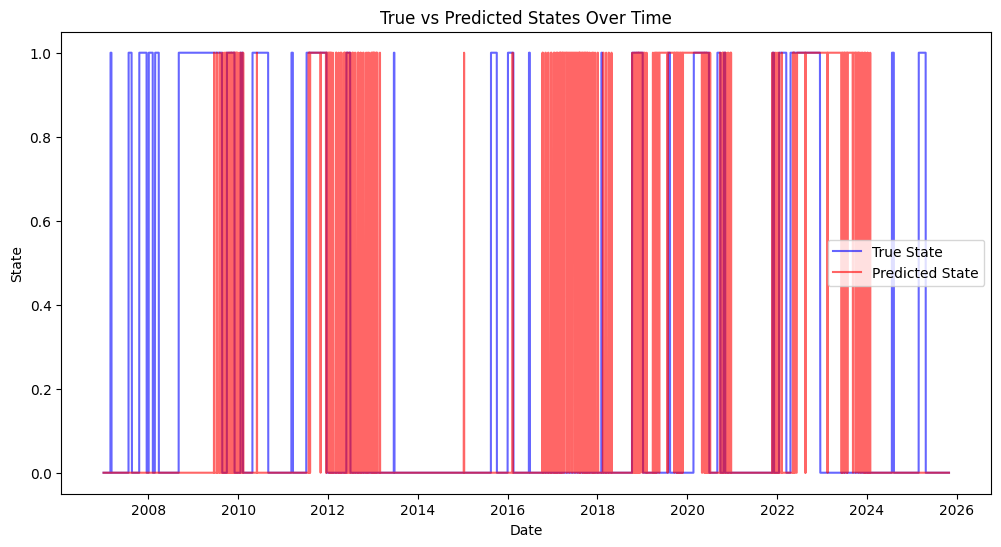

In [6]:
# create a plot of y_true, y_pred, dates for visual inspection
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(dates, y_true, label='True State', color='blue', alpha=0.6)
plt.plot(dates, y_pred, label='Predicted State', color='red', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('State')
plt.title('True vs Predicted States Over Time')
plt.legend()
plt.show()

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2801: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A si

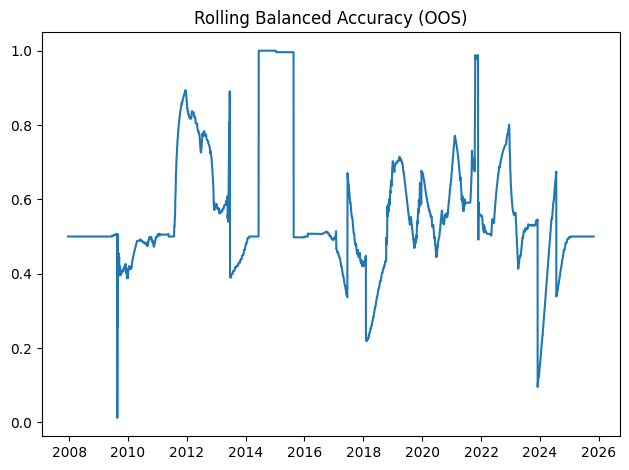

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

s = pd.Series((y_true == y_pred).astype(int), index=dates)

# rolling balanced accuracy needs recomputing on a window, not just mean correctness
win = 252  # e.g., 1y of daily data
roll = []
roll_idx = []
for i in range(win, len(dates)+1):
    yt = y_true[i-win:i]
    yp = y_pred[i-win:i]
    roll.append(balanced_accuracy_score(yt, yp))
    roll_idx.append(dates[i-1])

roll = pd.Series(roll, index=roll_idx)

plt.figure()
plt.plot(roll.index, roll.values)
plt.title("Rolling Balanced Accuracy (OOS)")
plt.tight_layout()
plt.show()


In [8]:
import matplotlib.pyplot as plt
import numpy as np

p = price.loc[dates]  # align
correct = (y_true == y_pred)

plt.figure()
plt.plot(dates, p.values)

# mark incorrect points on price
plt.scatter(dates[~correct], p.values[~correct], marker="x")

plt.title("Price with Incorrect Predictions Marked")
plt.tight_layout()
plt.show()

# separate figure: predicted state over time as a step line (clean)
plt.figure()
plt.step(dates, y_pred, where="post")
plt.title("Predicted State Over Time (OOS)")
plt.tight_layout()
plt.show()


NameError: name 'price' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score, f1_score, accuracy_score

def block_bootstrap_ci(y_true, y_pred, metric_fn, block_len=30, n_boot=1000, seed=0, alpha=0.05):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    n = len(y_true)
    if n == 0:
        return np.nan, (np.nan, np.nan)

    rng = np.random.default_rng(seed)

    # circular extension so blocks can wrap
    yt2 = np.concatenate([y_true, y_true[:block_len]])
    yp2 = np.concatenate([y_pred, y_pred[:block_len]])

    stats = np.empty(n_boot, dtype=float)

    n_blocks = int(np.ceil(n / block_len))

    for b in range(n_boot):
        starts = rng.integers(0, n, size=n_blocks)
        idx = np.concatenate([np.arange(s, s + block_len) for s in starts])[:n]
        stats[b] = metric_fn(yt2[idx], yp2[idx])

    point = metric_fn(y_true, y_pred)
    lo = np.quantile(stats, alpha/2)
    hi = np.quantile(stats, 1 - alpha/2)
    return point, (lo, hi)

# metric fns
def macro_f1(yt, yp): return f1_score(yt, yp, average="macro")
def bal_acc(yt, yp): return balanced_accuracy_score(yt, yp)
def acc(yt, yp): return accuracy_score(yt, yp)


In [ ]:
import pandas as pd

def yearly_metrics_with_ci(dates, y_true, y_pred, metric_fn, block_len=30, n_boot=1000, seed=0):
    dfm = pd.DataFrame({"y_true": y_true, "y_pred": y_pred}, index=pd.DatetimeIndex(dates))
    out = []
    for yr, g in dfm.groupby(dfm.index.year):
        point, (lo, hi) = block_bootstrap_ci(
            g["y_true"].to_numpy(), g["y_pred"].to_numpy(),
            metric_fn=metric_fn, block_len=block_len, n_boot=n_boot, seed=seed + int(yr)
        )
        out.append((yr, point, lo, hi, len(g)))
    return pd.DataFrame(out, columns=["year", "metric", "ci_lo", "ci_hi", "n"])


In [ ]:
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="mantis_rf_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

# Evaluate performance with standard metrics from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

[mantis_rf_head] refit at 2007-01-01 using data up to 2006-12-29 | predicted 1000 days
[mantis_rf_head] refit at 2010-11-01 using data up to 2010-10-29 | predicted 1000 days
[mantis_rf_head] refit at 2014-09-01 using data up to 2014-08-29 | predicted 1000 days
[mantis_rf_head] refit at 2018-07-02 using data up to 2018-06-29 | predicted 1000 days
[mantis_rf_head] refit at 2022-05-02 using data up to 2022-04-29 | predicted 915 days
Accuracy: 0.7662
Precision: 1.0000
Recall: 0.0481
F1 Score: 0.0917


In [ ]:
from source.plot_functions.plot_functions_classification import (block_metrics_with_ci,plot_price_with_regime_and_prob_ci, plot_block_metric_ci)

In [ ]:
pred_draws_df = pd.read_csv("../../Data/ModelData/pred_draws_df.csv", parse_dates=["timestamp"], index_col=0)

In [ ]:
# add y_true y_pred and dates as a dataframe new one
pred_df = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})

In [ ]:
pred_draws_df

,boot_id,y_true,p1,y_pred_draw
timestamp,,,,
2007-01-01,0,0,0.001387,0
2007-01-01,1,0,0.003079,0
2007-01-01,2,0,0.000000,0
2007-01-01,3,0,0.004564,0
2007-01-01,4,0,0.008706,0
...,...,...,...,...
2025-10-31,195,0,0.058485,0
2025-10-31,196,0,0.073750,0
2025-10-31,197,0,0.107655,0


In [ ]:
summary = block_metrics_with_ci(pred _df, pred_draws_df, refit_every=30, metric="accuracy", alpha=0.05)
plot_block_metric_ci(summary, "Block Accuracy with Bootstrap CI")


/Users/kilianrunnwerth/Masterarbeit/source/plot_functions/plot_functions_classification.py:81: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  boot_scores = gb.apply(lambda g: mfn(g["y_true"].values, g["y_pred_draw"].values)).rename("score").reset_index()


TypeError: Index(...) must be called with a collection of some kind, 'score' was passed

In [ ]:
from importlib import reload
reload(modl)

<module 'source.Classification.models_classification' from '/Users/kilianrunnwerth/Masterarbeit/source/Classification/models_classification.py'>

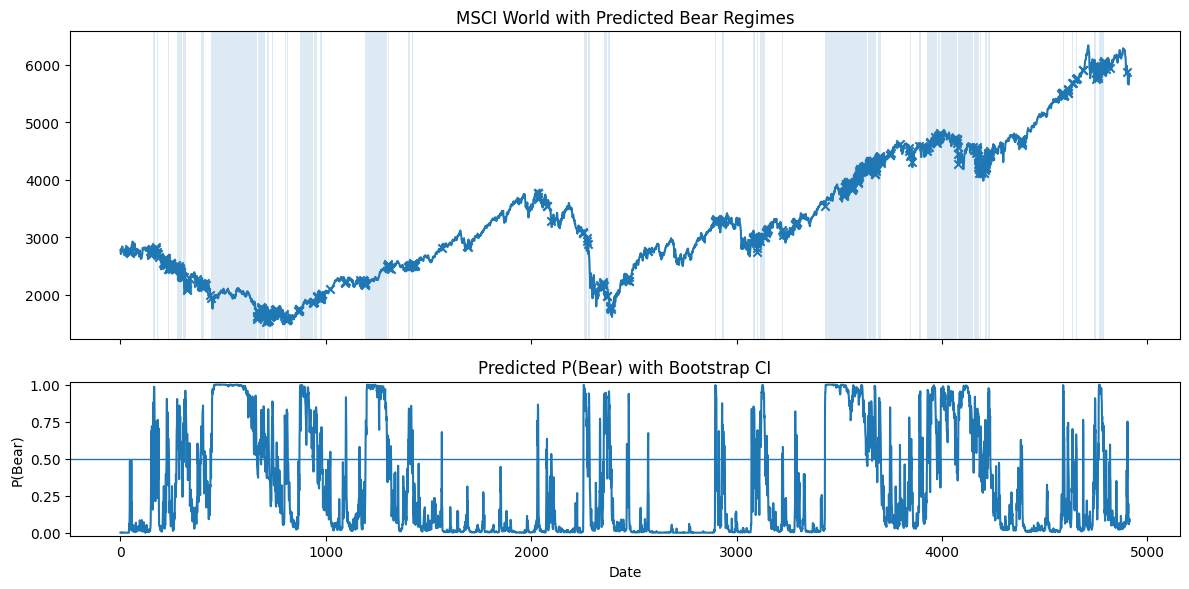

In [ ]:
plot_price_with_regime_and_prob_ci(df["M1WO_O"] , pred_df)


In [ ]:
df

,timestamp,CL1,M1WO,SXXT,SPX,NKY,SPTR,EUR003M,FEDL01,GC1,V2X,MOVE,VIX,USYC2Y10,VXJ,state,regime
0,2000-01-05,-0.025368,-0.013681,-0.028356,0.001920,0.000000,0.002008,-0.002,0.03,-0.005656,3.484005,4.669927,3.273743,3.386084,3.258097,1,Bear
1,2000-01-06,-0.005232,-0.011378,-0.006598,0.000955,0.000000,0.001155,-0.010,0.13,0.001063,3.439777,4.655958,3.247658,3.072693,3.296207,1,Bear
2,2000-01-07,-0.022858,0.023399,0.031469,0.026730,-6.583663,0.026730,-0.009,0.07,0.001769,3.312002,4.583027,3.078233,2.747271,3.247658,1,Bear
3,2000-01-10,0.018409,0.011027,0.015271,0.011128,6.583663,0.011147,-0.005,0.13,-0.000707,3.309448,4.576050,3.077773,2.513656,3.247658,0,Bull
4,2000-01-11,0.043623,-0.003420,-0.004971,-0.013149,-3.338158,-0.013119,-0.002,-0.11,0.005995,3.330775,4.615418,3.113515,2.917771,3.151881,0,Bull
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,2025-10-27,-0.003094,0.010805,0.004416,0.012215,0.592428,0.012220,0.012,0.01,-0.028695,2.793794,4.202750,2.759377,3.889532,3.425890,0,Bull
6734,2025-10-28,-0.019102,0.001684,-0.000087,0.002285,3.717267,0.002290,-0.010,0.00,-0.008961,2.799547,4.209160,2.798500,3.879087,3.279406,0,Bull
6735,2025-10-29,0.005471,-0.000275,-0.000449,-0.000044,-3.842365,-0.000037,-0.008,0.00,0.004403,2.835241,4.185860,2.828496,3.862139,3.330775,0,Bull
6736,2025-10-30,0.001487,-0.009830,-0.001306,-0.009954,-4.115259,-0.009948,-0.016,-0.25,0.008050,2.825798,4.202900,2.827905,3.880863,3.249987,0,Bull
